# Aula 3 - feature engineering na prática com titanic

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução
- 2) (breve) EDA Titanic
- 3) Feature engineering titanic
- 4) Feature engineering na Pipeline


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ml_utils import *

____
____
_____

## 1) Introdução

O processo de **feature engineering** refere-se a qualquer procedimento que tem como finalidade a **criação de novas features**.

<img src="https://estatsite.com.br/wp-content/uploads/2021/02/maiores_desafios_ml_2.png" width=500>

Podemos fazer iso de diversas maneiras, e já conhecemos algumas, que são formas mais quantitativas de criar features:

- `PolynomialFeatures`;
- `PCA`;
- Kernel Trick no SVM (indiretamente);

Por outro lado, quase sempre quando usamos o termo "feature engineering" nos referimos a um procedimento particular para este fim:

> Utilização de conhecimentos do negócio (do problema) para criação de novas features, a partir dos dados brutos.

Veja que este procedimento se difere dos anteriores pelo fato de ser muito mais **qualitativo**, dependente de conhecimentos específicos do problema (que muitas vezes adquirimos justamente durante a EDA!)

Dada esta característica, o procedimento exato de feature engineering é muito variável de problema pra problema. Isto é, é dificíl criarmos regras gerais que valham genericamente pra absolotutamente todo e qualquer problema.

Apesar disso, há alguns processamentos que são bem comuns, e que podemos usar, sobretudo para features numéricas. 

Vamos conhecer esses procedimentos mais genéricos quando aplicarmos o feature engineering ao projeto! Na aula de hoje, nosso principal objetivo será estabelecer as principais ferramentas para **integrar** o feature engineering às nossas pipelines!

Então, vamos pra prática!

______________

## 2) (breve) EDA Titanic

Vamos explorar um pouco o dataset do [Titanic](https://www.kaggle.com/c/titanic).

In [3]:
df = pd.read_csv("../datasets/titanic.csv")

In [4]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?,328,?
1305,3,0,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,?,C,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?,304,?
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?,?,?


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


In [6]:
df = pd.read_csv("../datasets/titanic.csv", na_values="?")

In [7]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


______________

In [9]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


## 3) Feature engineering titanic

Vamos, inicialmente, discutir algumas features que podemos criar a partir dos dados brutos do Titanic!

Primeiramente, vamos analisar a coluna de nomes:

In [10]:
df["name"].nunique()

1307

In [11]:
df["name"].value_counts()

Connolly, Miss. Kate             2
Kelly, Mr. James                 2
Allen, Miss. Elisabeth Walton    1
Ilmakangas, Miss. Ida Livija     1
Ilieff, Mr. Ylio                 1
                                ..
Hart, Miss. Eva Miriam           1
Harris, Mr. Walter               1
Harris, Mr. George               1
Harper, Rev. John                1
Zimmerman, Mr. Leo               1
Name: name, Length: 1307, dtype: int64

In [12]:
df["name"]

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: object

Analisando a estrutura dos nomes na base, podemos claramente extrair o sobrenome das pessoas, bem como seus títulos, que podem ser informações relevantes!

In [13]:
for i in range(10):

    nome = df["name"][i]

    print(nome, " | ", nome.split(", ")[-1].split(". ")[0])

Allen, Miss. Elisabeth Walton  |  Miss
Allison, Master. Hudson Trevor  |  Master
Allison, Miss. Helen Loraine  |  Miss
Allison, Mr. Hudson Joshua Creighton  |  Mr
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  |  Mrs
Anderson, Mr. Harry  |  Mr
Andrews, Miss. Kornelia Theodosia  |  Miss
Andrews, Mr. Thomas Jr  |  Mr
Appleton, Mrs. Edward Dale (Charlotte Lamson)  |  Mrs
Artagaveytia, Mr. Ramon  |  Mr


In [14]:
titulos = df["name"].apply(lambda nome: nome.split(", ")[-1].split(". ")[0])

titulos

0         Miss
1       Master
2         Miss
3           Mr
4          Mrs
         ...  
1304      Miss
1305      Miss
1306        Mr
1307        Mr
1308        Mr
Name: name, Length: 1309, dtype: object

In [15]:
titulos.value_counts(dropna=False)

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Capt              1
Sir               1
Dona              1
Jonkheer          1
the Countess      1
Don               1
Mme               1
Lady              1
Name: name, dtype: int64

In [16]:
titulos.unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [17]:
df.loc[titulos[~titulos.isin(['Miss', 'Master', 'Mr', 'Mrs'])].index][["name", "survived", "pclass", "sex", "age"]]

,name,survived,pclass,sex,age
10,"Astor, Col. John Jacob",0,1,male,47.0
12,"Aubart, Mme. Leontine Pauline",1,1,female,24.0
40,"Brewe, Dr. Arthur Jackson",0,1,male,NaN
45,"Butt, Major. Archibald Willingham",0,1,male,45.0
81,"Crosby, Capt. Edward Gifford",0,1,male,70.0
93,"Dodge, Dr. Washington",1,1,male,53.0
99,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",1,1,female,48.0
100,"Duff Gordon, Sir. Cosmo Edmund ('Mr Morgan')",1,1,male,49.0
119,"Frauenthal, Dr. Henry William",1,1,male,50.0
136,"Gracie, Col. Archibald IV",1,1,male,53.0


In [18]:
titulos

0         Miss
1       Master
2         Miss
3           Mr
4          Mrs
         ...  
1304      Miss
1305      Miss
1306        Mr
1307        Mr
1308        Mr
Name: name, Length: 1309, dtype: object

Há duas colunas de familiares, `sibsp` (# of siblings / spouses aboard the Titanic) e `parch` (# of parents / children aboard the Titanic)

In [19]:
df[["sibsp", "parch"]]

,sibsp,parch
0,0,0
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
1304,1,0
1305,1,0
1306,0,0
1307,0,0


Podemos criar uma nova feature que leva em consideração o número total de familiares que cada passageiro tem a bordo:

In [20]:
# df[["sibsp", "parch"]].sum(axis="columns")

n_familiares = df[["sibsp", "parch"]].sum(axis=1)

n_familiares

0       0
1       3
2       3
3       3
4       3
       ..
1304    1
1305    1
1306    0
1307    0
1308    0
Length: 1309, dtype: int64

A partir da coluna `fare`, podemos criar novas features que tomam a razão entre os valores mínimos e máximos pagos pela passagem:

In [21]:
df["fare"].max()

512.3292

In [22]:
df["fare"]

0       211.3375
1       151.5500
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.4542
1305     14.4542
1306      7.2250
1307      7.2250
1308      7.8750
Name: fare, Length: 1309, dtype: float64

In [23]:
fare_over_max = df["fare"]/df["fare"].max()

fare_over_max 

0       0.412503
1       0.295806
2       0.295806
3       0.295806
4       0.295806
          ...   
1304    0.028213
1305    0.028213
1306    0.014102
1307    0.014102
1308    0.015371
Name: fare, Length: 1309, dtype: float64

In [24]:
(df["fare"]/df["fare"].max()).sort_values(ascending=False)

183     1.000000
302     1.000000
49      1.000000
50      1.000000
113     0.513342
          ...   
363     0.000000
384     0.000000
581     0.000000
410     0.000000
1225         NaN
Name: fare, Length: 1309, dtype: float64

Podemos fazer o mesmo com o mínimo (que deve ser diferente de zero!):

In [25]:
df["fare"].min()

0.0

In [26]:
df["fare"].sort_values().unique()[1]

3.1708

In [27]:
fare_over_min = df["fare"]/df["fare"].sort_values().unique()[1]

fare_over_min

0       66.651161
1       47.795509
2       47.795509
3       47.795509
4       47.795509
          ...    
1304     4.558534
1305     4.558534
1306     2.278605
1307     2.278605
1308     2.483600
Name: fare, Length: 1309, dtype: float64

Por fim, pode ser interessante discretizarmos a coluna de idades (`age`) em faixas etárias!

In [28]:
df["age"]

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [29]:
df["age"].max()

80.0

In [30]:
pd.cut(df["age"], bins=(0, 12, 18, 30, 60, df["age"].max()), right=True)

0       (18.0, 30.0]
1        (0.0, 12.0]
2        (0.0, 12.0]
3       (18.0, 30.0]
4       (18.0, 30.0]
            ...     
1304    (12.0, 18.0]
1305             NaN
1306    (18.0, 30.0]
1307    (18.0, 30.0]
1308    (18.0, 30.0]
Name: age, Length: 1309, dtype: category
Categories (5, interval[float64, right]): [(0.0, 12.0] < (12.0, 18.0] < (18.0, 30.0] < (30.0, 60.0] < (60.0, 80.0]]

In [31]:
faixa_etaria = pd.cut(df["age"], bins=(0, 12, 18, 30, 60, df["age"].max()), right=True).cat.codes

faixa_etaria

0       2
1       0
2       0
3       2
4       2
       ..
1304    1
1305   -1
1306    2
1307    2
1308    2
Length: 1309, dtype: int8

In [32]:
# esses são os -1 do .cat.codes, acima!
df["age"].isnull().sum()

263

In [33]:
faixa_etaria.value_counts(dropna=False)

 2    416
 3    404
-1    263
 1     99
 0     94
 4     33
dtype: int64

E aí, você consegue pensar em alguma outra feature que podemos criar?

In [34]:
# pra casa: pensar em outras features

______________

## 4) Feature engineering na Pipeline

Na prática, a análise feita acima é muito importante para identificarmos possíveis novas features a serem construídas a partir das features originais e/ou dados brutos.

No entanto, pensando no fluxo de modelagem, seria interessante que pudéssemos integrar o processo de feature engineering à Pipeline, não é mesmo? Caso contrário, teríamos que manualmente criar as novas features tanto na base de treino quanto de teste, e, pior, fazer este procedimento manual no modelo em produção --- o que certamente não é nada praticável!

Há situações em que o procedimento que faremos a seguir é integrado como parte do [ETL](https://www.sas.com/pt_br/insights/data-management/o-que-e-etl.html#:~:text=ETL%20%C3%A9%20um%20tipo%20de,para%20construir%20um%20data%20warehouse.) de dados, sendo responsabilidade da engenharia de dados. No entanto, quando isso não for possível, podemos integrar o procedimento às Pipelines de modelagem, como estamos acostumados.

Vamos ver isso na prática!

Mas antes, vamos fazer um modelo baseline:

- Jogar fora NaNs e dados nulos, e treinar alguns classificadores simples

In [35]:
df = pd.read_csv("../datasets/titanic.csv", na_values="?")

df_model_baseline = df.select_dtypes(include=np.number).dropna(axis=1)

X = df_model_baseline.drop(columns="survived")
y = df_model_baseline["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [36]:
X_train

,pclass,sibsp,parch
999,3,0,0
392,2,1,0
628,3,4,2
1165,3,0,0
604,3,0,0
...,...,...,...
1290,3,1,0
1103,3,4,1
755,3,2,0
530,2,0,0


Métricas de avaliação de treino - com cutoff = 0.50


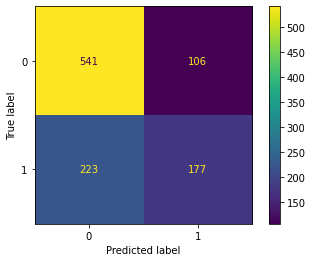

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       647
           1       0.63      0.44      0.52       400

    accuracy                           0.69      1047
   macro avg       0.67      0.64      0.64      1047
weighted avg       0.68      0.69      0.67      1047


################################################################################

Métricas de avaliação de teste - com cutoff = 0.50


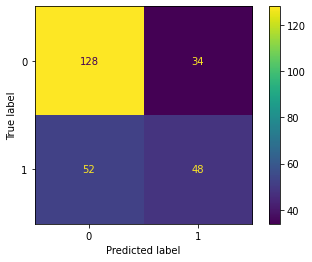

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       162
           1       0.59      0.48      0.53       100

    accuracy                           0.67       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.66      0.67      0.66       262



In [37]:
from sklearn.linear_model import LogisticRegression

logit_baseline = Pipeline([("ss", StandardScaler()),
                           ("logit", LogisticRegression())])

logit_baseline.fit(X_train, y_train)

_ = clf_metrics_train_test(logit_baseline, X_train, y_train, X_test, y_test, cutoff=0.5, 
                           plot_conf_matrix=True, print_cr=True, pos_label=1)

Agora, vamos fazer modelos com pipelines mais complexas!

Começamos só com as pipelines (generalizada com `ColumnTransformer`), pra identificar estimadores promissores (hiperparâmetros default).

In [38]:
titulos.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Capt              1
Sir               1
Dona              1
Jonkheer          1
the Countess      1
Don               1
Mme               1
Lady              1
Name: name, dtype: int64

In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

def pipe_pre_process_titanic(cols_to_drop_not_features=["survived"], col_target="survived",
                             inputer_num_strategy="mean",
                             encoding="onehot"):
    '''
    - inputer_num_strategy (str): "mean", "median";
    - encoding (str): "onehot" para OneHotEncoder; "ordinal" OrdinalEncoder;
    '''
    
    df = pd.read_csv("../datasets/titanic.csv", na_values="?")

    X = df.drop(columns=cols_to_drop_not_features)
    y = df[col_target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # ==========================================================

    pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy=inputer_num_strategy)),
                                  ("std", StandardScaler())])

    features_num = X_train.select_dtypes(include=np.number).columns.tolist()

    # ==========================================================

    if encoding == "onehot":
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("onehot", OneHotEncoder(handle_unknown="ignore"))])
        
    elif encoding == "ordinal":
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value",
                                                                 unknown_value=-1))])    
    else:
        raise ValueError("Únicos encodings disponíveis são 'ordinal' e 'onehot'")
        
        
    features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()

    # ==========================================================

    pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                         ("transf_cat", pipe_features_cat, features_cat)])

    return X_train, X_test, y_train, y_test, pre_processador

Vamos tentar usar direto todas as features disponíveis!!

In [40]:
(X_train, X_test, 
 y_train, y_test, 
 pre_processador) = pipe_pre_process_titanic(cols_to_drop_not_features=["survived"], col_target="survived",
                                             inputer_num_strategy="mean",
                                             encoding="onehot")

In [41]:
pre_processador

ColumnTransformer(transformers=[('transf_num',
                                 Pipeline(steps=[('input_num', SimpleImputer()),
                                                 ('std', StandardScaler())]),
                                 ['pclass', 'age', 'sibsp', 'parch', 'fare',
                                  'body']),
                                ('transf_cat',
                                 Pipeline(steps=[('input_cat',
                                                  SimpleImputer(fill_value='unknown',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['name', 'sex', 'ticket', 'cabin', 'embarked',
                                  'boat', 'home.dest'])])

Métricas de avaliação de treino - com cutoff = 0.50


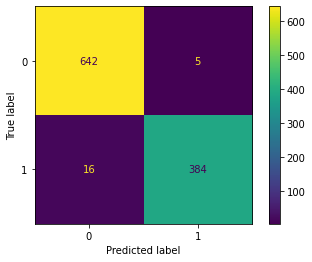

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       647
           1       0.99      0.96      0.97       400

    accuracy                           0.98      1047
   macro avg       0.98      0.98      0.98      1047
weighted avg       0.98      0.98      0.98      1047


################################################################################

Métricas de avaliação de teste - com cutoff = 0.50


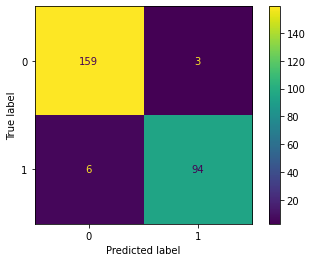

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       162
           1       0.97      0.94      0.95       100

    accuracy                           0.97       262
   macro avg       0.97      0.96      0.96       262
weighted avg       0.97      0.97      0.97       262



In [42]:
logit_com_ct = Pipeline([("pre_processador", pre_processador),
                         ("logit", LogisticRegression())])

logit_com_ct.fit(X_train, y_train)

_ = clf_metrics_train_test(logit_com_ct, X_train, y_train, X_test, y_test, cutoff=0.5, 
                           plot_conf_matrix=True, print_cr=True, pos_label=1)

Há algumas colunas nesta base "melhorada" que são muitíssimo correlacionadas com o target, veja:

Variável `boat`:

In [43]:
df.shape[0]

1309

In [44]:
df["boat"].isnull().sum()/df.shape[0]

0.6287242169595111

In [45]:
df.dropna(subset=["boat"])["survived"].value_counts(normalize=True)

1    0.981481
0    0.018519
Name: survived, dtype: float64

Variável `body`:

In [46]:
df["body"]

0         NaN
1         NaN
2         NaN
3       135.0
4         NaN
        ...  
1304    328.0
1305      NaN
1306    304.0
1307      NaN
1308      NaN
Name: body, Length: 1309, dtype: float64

In [47]:
df["body"].isnull().sum()/df.shape[0]

0.907563025210084

In [48]:
df.dropna(subset=["body"])["survived"].value_counts(normalize=True)

0    1.0
Name: survived, dtype: float64

Vamos excluir essas colunas, e algumas outras que também não devem agregar tanta informação:

In [49]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [50]:
print(df.columns.tolist())

['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']


In [51]:
drop = ["survived", 'name', 'ticket', 'cabin', 'boat', 'body', 'home.dest']

(X_train, X_test, 
 y_train, y_test, 
 pre_processador_com_ct) = pipe_pre_process_titanic(cols_to_drop_not_features=drop, col_target="survived",
                                                     inputer_num_strategy="mean",
                                                     encoding="onehot")

In [52]:
X_train

,pclass,sex,age,sibsp,parch,fare,embarked
999,3,female,NaN,0,0,7.7500,Q
392,2,female,24.0,1,0,27.7208,C
628,3,female,11.0,4,2,31.2750,S
1165,3,male,25.0,0,0,7.2250,C
604,3,female,16.0,0,0,7.6500,S
...,...,...,...,...,...,...,...
1290,3,female,47.0,1,0,7.0000,S
1103,3,male,2.0,4,1,39.6875,S
755,3,male,17.0,2,0,8.0500,S
530,2,male,19.0,0,0,10.5000,S


Métricas de avaliação de treino - com cutoff = 0.50


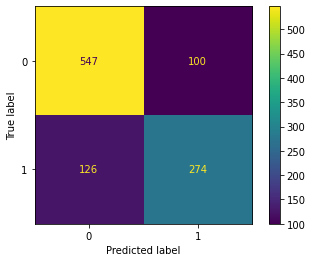

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       647
           1       0.73      0.69      0.71       400

    accuracy                           0.78      1047
   macro avg       0.77      0.77      0.77      1047
weighted avg       0.78      0.78      0.78      1047


################################################################################

Métricas de avaliação de teste - com cutoff = 0.50


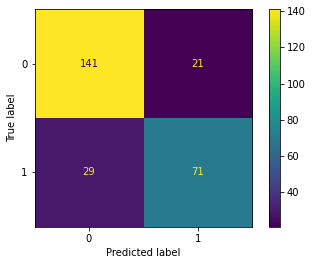

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       162
           1       0.77      0.71      0.74       100

    accuracy                           0.81       262
   macro avg       0.80      0.79      0.79       262
weighted avg       0.81      0.81      0.81       262



In [53]:
logit_com_ct = Pipeline([("pre_processador", pre_processador_com_ct),
                         ("logit", LogisticRegression())])

logit_com_ct.fit(X_train, y_train)

_ = clf_metrics_train_test(logit_com_ct, X_train, y_train, X_test, y_test, cutoff=0.5, 
                           plot_conf_matrix=True, print_cr=True, pos_label=1)

Vamos treinar um modelo um pouco mais complexto:

Métricas de avaliação de treino - com cutoff = 0.50


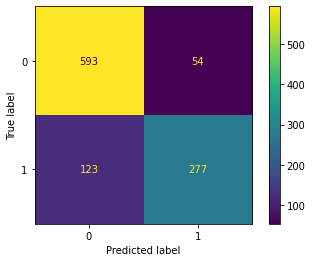

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       647
           1       0.84      0.69      0.76       400

    accuracy                           0.83      1047
   macro avg       0.83      0.80      0.81      1047
weighted avg       0.83      0.83      0.83      1047


################################################################################

Métricas de avaliação de teste - com cutoff = 0.50


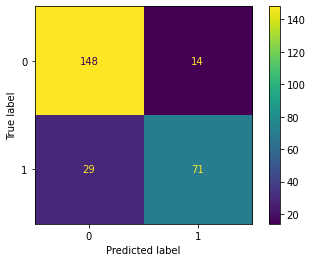

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       162
           1       0.84      0.71      0.77       100

    accuracy                           0.84       262
   macro avg       0.84      0.81      0.82       262
weighted avg       0.84      0.84      0.83       262



In [54]:
from lightgbm import LGBMClassifier

drop = ["survived", 'name', 'ticket', 'cabin', 'boat', 'body', 'home.dest']

(X_train, X_test, 
 y_train, y_test, 
 pre_processador_com_ct) = pipe_pre_process_titanic(cols_to_drop_not_features=drop, col_target="survived",
                                                     inputer_num_strategy="mean",
                                                     encoding="onehot")

# ===================================================


lgbm_com_ct = Pipeline([("pre_processador", pre_processador_com_ct),
                         ("lgbm", LGBMClassifier(n_estimators=250,
                                                 reg_alpha=5,
                                                 reg_lambda=5))])

lgbm_com_ct.fit(X_train, y_train)

_ = clf_metrics_train_test(lgbm_com_ct, X_train, y_train, X_test, y_test, cutoff=0.5, 
                           plot_conf_matrix=True, print_cr=True, pos_label=1)

Vamos agora **adicionar o feature engineering à pipeline!**

Para isso, vamos ter que [criar nossa própria classe do sklearn](https://scikit-learn.org/stable/developers/develop.html), que terá como objetivo a criação de features!

Vamos criar uma classe pra criação das features qualitativas que discutimos acima!

Uma outra classe que será útil é uma classe para jogar fora as colunas originais que foram utilizadas para construir as novas features!

Por exemplo, a coluna `name`: vamos utilizá-la para construir a coluna de títulos, então ela entra na pipeline de feature engineering; Mas, depois que construirmos a nova feature, devemos eliminar a coluna original, pra isso usamos a classe abaixo, para eliminar a coluna original!

In [69]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEngTitanic(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        
        pass
        
        
    def fit(self, X, y=None):
        
        return self
        
        
    def transform(self, X, y=None):
        '''
        é nesse método que definimos as features que vão ser criadas!
        
        o procedimento aqui foi determinado qualitativamente, na EDA que fizemos acima!
        '''
        
        X["title"] = X["name"].apply(lambda x: x.split(", ")[1].split(".")[0])

        X["total_family"] = X[["sibsp", "parch"]].sum(axis=1)

        X["frac_max_fare"] = X["fare"]/X["fare"].max()

        X["frac_min_fare"] = X["fare"]/X["fare"].sort_values().unique()[1]

        X["age_group"] = pd.cut(X["age"], bins=(0, 12, 18, 30, 60, X["age"].max()), right=True).cat.codes
        
        return X
    
#########################################################

class ColumnDropper(BaseEstimator, TransformerMixin):
    
    def __init__(self, cols_to_drop):
        '''
        cols_to_drop: lista com colunas a serem dropadas
        '''
        
        self.cols_to_drop = cols_to_drop
             
    def fit(self, X, y=None):
        
        return self
    
    def transform(self, X, y=None):
        
        return X.drop(columns=self.cols_to_drop)


In [70]:
col_target="survived"

df = pd.read_csv("../datasets/titanic.csv", na_values="?")

X = df.drop(columns=col_target)
y = df[col_target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [74]:
# features originais
X_train.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,total_family,frac_max_fare,frac_min_fare,age_group
999,3,"McCarthy, Miss. Catherine 'Katie'",female,NaN,0,0,383123,7.7500,NaN,Q,15 16,NaN,NaN,Miss,0,0.015127,2.444178,-1
392,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0,1,0,SC/PARIS 2167,27.7208,NaN,C,12,NaN,"Lucca, Italy / California",Mrs,1,0.054107,8.742526,2
628,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S,NaN,NaN,"Sweden Winnipeg, MN",Miss,6,0.061045,9.863441,0
1165,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.2250,NaN,C,NaN,NaN,NaN,Mr,0,0.014102,2.278605,2
604,3,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.6500,NaN,S,16,NaN,"Norway Los Angeles, CA",Miss,0,0.014932,2.412640,1


In [75]:
# esse é o passo de criação de features,
# mas ainda está com as features INDESEJADAS!

fet = FeatureEngTitanic().fit(X_train)

X_train_com_fe = fet.transform(X_train)

X_train_com_fe.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,total_family,frac_max_fare,frac_min_fare,age_group
999,3,"McCarthy, Miss. Catherine 'Katie'",female,NaN,0,0,383123,7.7500,NaN,Q,15 16,NaN,NaN,Miss,0,0.015127,2.444178,-1
392,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0,1,0,SC/PARIS 2167,27.7208,NaN,C,12,NaN,"Lucca, Italy / California",Mrs,1,0.054107,8.742526,2
628,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S,NaN,NaN,"Sweden Winnipeg, MN",Miss,6,0.061045,9.863441,0
1165,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.2250,NaN,C,NaN,NaN,NaN,Mr,0,0.014102,2.278605,2
604,3,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.6500,NaN,S,16,NaN,"Norway Los Angeles, CA",Miss,0,0.014932,2.412640,1


In [78]:
cd = ColumnDropper(cols_to_drop=['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest']).fit(X_train)

cd.transform(X_train_com_fe)

,pclass,sex,age,sibsp,parch,fare,embarked,title,total_family,frac_max_fare,frac_min_fare,age_group
999,3,female,NaN,0,0,7.7500,Q,Miss,0,0.015127,2.444178,-1
392,2,female,24.0,1,0,27.7208,C,Mrs,1,0.054107,8.742526,2
628,3,female,11.0,4,2,31.2750,S,Miss,6,0.061045,9.863441,0
1165,3,male,25.0,0,0,7.2250,C,Mr,0,0.014102,2.278605,2
604,3,female,16.0,0,0,7.6500,S,Miss,0,0.014932,2.412640,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1290,3,female,47.0,1,0,7.0000,S,Mrs,1,0.013663,2.207645,3
1103,3,male,2.0,4,1,39.6875,S,Master,5,0.077465,12.516557,0
755,3,male,17.0,2,0,8.0500,S,Mr,2,0.015713,2.538791,1
530,2,male,19.0,0,0,10.5000,S,Mr,0,0.020495,3.311467,2


Agora, colocando tudo numa pipeline:

In [79]:
cols_to_drop=['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest']

pipe_feat_eng = Pipeline([("create_features", FeatureEngTitanic()),
                          ("column_dropper", ColumnDropper(cols_to_drop))]).fit(X_train)

pipe_feat_eng.transform(X_train)

,pclass,sex,age,sibsp,parch,fare,embarked,title,total_family,frac_max_fare,frac_min_fare,age_group
999,3,female,NaN,0,0,7.7500,Q,Miss,0,0.015127,2.444178,-1
392,2,female,24.0,1,0,27.7208,C,Mrs,1,0.054107,8.742526,2
628,3,female,11.0,4,2,31.2750,S,Miss,6,0.061045,9.863441,0
1165,3,male,25.0,0,0,7.2250,C,Mr,0,0.014102,2.278605,2
604,3,female,16.0,0,0,7.6500,S,Miss,0,0.014932,2.412640,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1290,3,female,47.0,1,0,7.0000,S,Mrs,1,0.013663,2.207645,3
1103,3,male,2.0,4,1,39.6875,S,Master,5,0.077465,12.516557,0
755,3,male,17.0,2,0,8.0500,S,Mr,2,0.015713,2.538791,1
530,2,male,19.0,0,0,10.5000,S,Mr,0,0.020495,3.311467,2


Agora sim, vamos refazer nossa função, com a pipe de feature engineering!

In [84]:
def pipe_pre_process_titanic_with_feat_eng(cols_to_drop_not_features=[], col_target="survived",
                                           inputer_num_strategy="mean",
                                           encoding="onehot"):
    '''
    pipeline titanic com feature engineering
    
    - inputer_num_strategy (str): "mean", "median";
    - encoding (str): "onehot" para OneHotEncoder; "ordinal" OrdinalEncoder;
    '''
    
    df = pd.read_csv("../datasets/titanic.csv", na_values="?")

    X = df.drop(columns=col_target)
    y = df[col_target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # ==========================================================
    # adicionando o passo de feature engineering
    
    pipe_feat_eng = Pipeline([("create_features", FeatureEngTitanic()),
                              ("column_dropper", ColumnDropper(cols_to_drop_not_features))]).fit(X_train)

    X_train = pipe_feat_eng.transform(X_train)
    X_test = pipe_feat_eng.transform(X_test)
    
    # ==========================================================

    pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy=inputer_num_strategy)),
                                  ("std", StandardScaler())])

    features_num = X_train.select_dtypes(include=np.number).columns.tolist()

    # ==========================================================

    if encoding == "onehot":
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("onehot", OneHotEncoder(handle_unknown="ignore"))])
        
    elif encoding == "ordinal":
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value",
                                                                 unknown_value=-1))])    
    else:
        raise ValueError("Únicos encodings disponíveis são 'ordinal' e 'onehot'")
        
        
    features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()

    # ==========================================================

    pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                         ("transf_cat", pipe_features_cat, features_cat)])

    return X_train, X_test, y_train, y_test, pre_processador

Agora vamos testá-la!

Métricas de avaliação de treino - com cutoff = 0.50


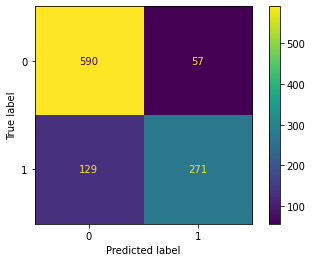

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       647
           1       0.83      0.68      0.74       400

    accuracy                           0.82      1047
   macro avg       0.82      0.79      0.80      1047
weighted avg       0.82      0.82      0.82      1047


################################################################################

Métricas de avaliação de teste - com cutoff = 0.50


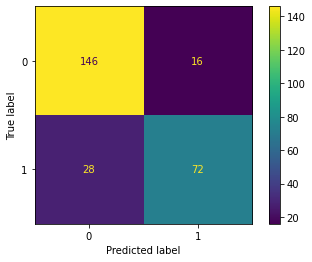

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       162
           1       0.82      0.72      0.77       100

    accuracy                           0.83       262
   macro avg       0.83      0.81      0.82       262
weighted avg       0.83      0.83      0.83       262



In [89]:
from lightgbm import LGBMClassifier

drop = ['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest']

(X_train, X_test, 
 y_train, y_test, 
 pre_processador_com_ct_fe) = pipe_pre_process_titanic_with_feat_eng(cols_to_drop_not_features=drop, col_target="survived",
                                                                     inputer_num_strategy="mean",
                                                                     encoding="onehot")

# ===================================================

lgbm_com_ct_fe = Pipeline([("pre_processador", pre_processador_com_ct_fe),
                           ("lgbm", LGBMClassifier(n_estimators=250,
                                                   reg_alpha=5,
                                                   reg_lambda=5))])

lgbm_com_ct_fe.fit(X_train, y_train)

_ = clf_metrics_train_test(lgbm_com_ct_fe, X_train, y_train, X_test, y_test, cutoff=0.5, 
                           plot_conf_matrix=True, print_cr=True, pos_label=1)

Agora sim, temos todas as ferramentas necessárias para construirmos uma pipeline de pré-processamento bem completa! Pratique bastante, e utilize isso em seus projetos!

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/e27aafaa-be21-4793-893c-82db577c62e3.png" width=700>